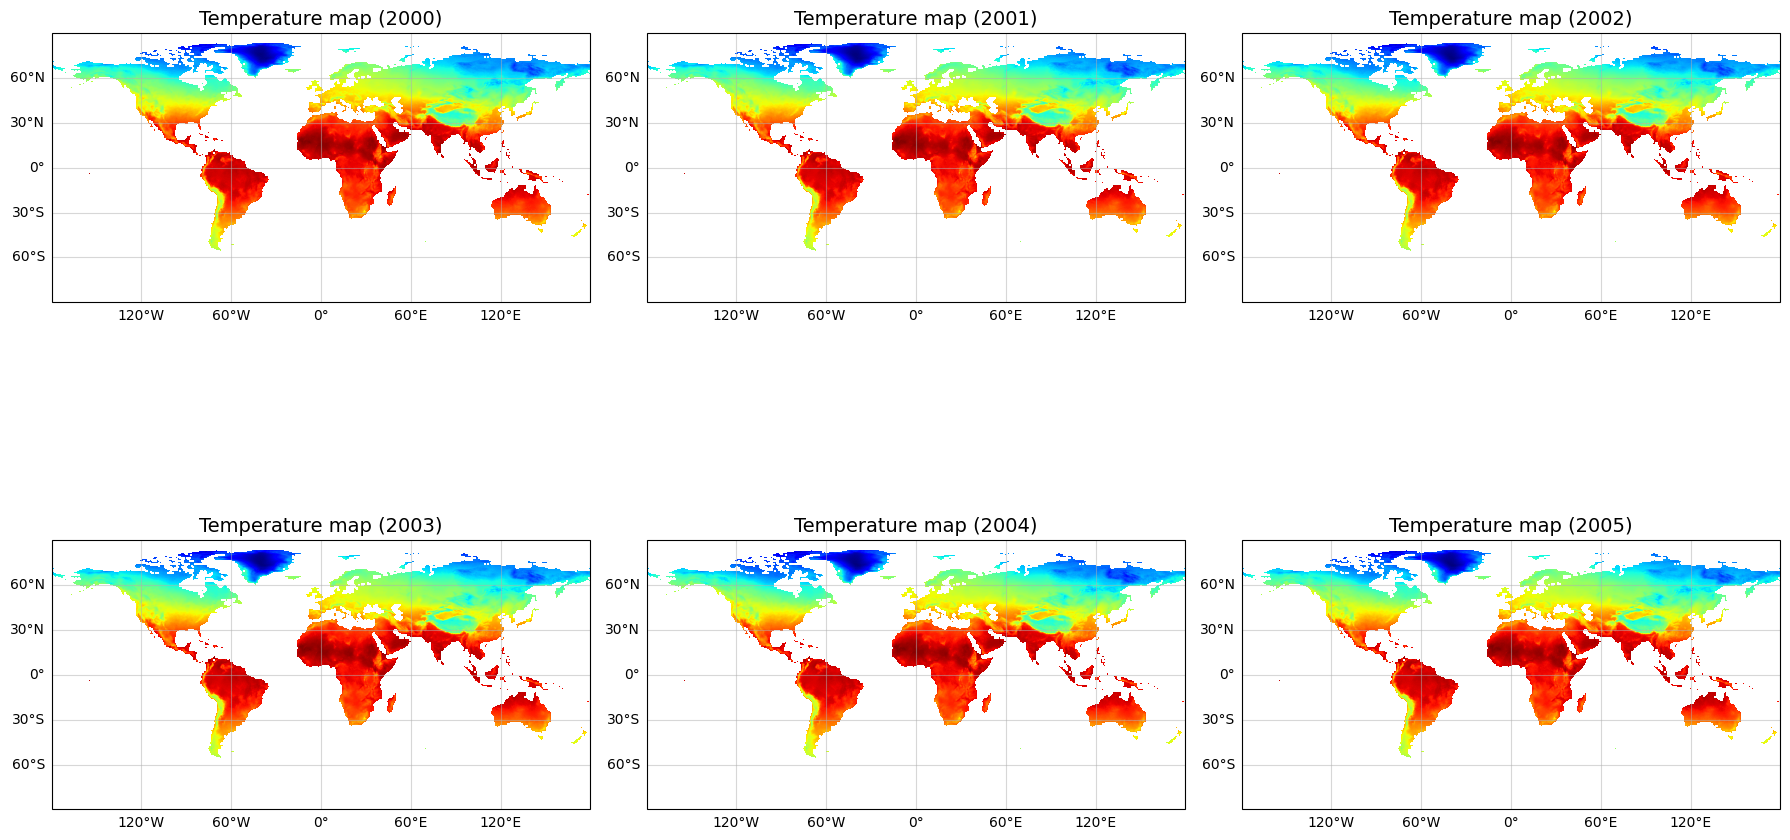

In [1]:
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd

# เปิดไฟล์ NetCDF
ds = xr.open_dataset("../dataset-nc/cru_ts4.08.1901.2023.tmp.dat.nc")
data_var = ds.metpy.parse_cf('tmp')

# แปลง 'time' ให้เป็น Datetime เพื่อกรองปีได้ง่ายขึ้น
ds['time'] = pd.to_datetime(ds['time'].values)

# เลือกข้อมูลเฉพาะปี 2000 ถึง 2005
data_filtered = ds.sel(time=slice('2000-01-01', '2005-12-31'))

# สร้าง figure และ subplots สำหรับแต่ละปี
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12), subplot_kw={'projection': ccrs.PlateCarree()})
axs = axs.flatten()  # แปลง array เป็น 1D เพื่อง่ายต่อการจัดการ

# วนลูปพล็อต heatmap สำหรับแต่ละปี
for i, year in enumerate(range(2000, 2006)):
    # กรองข้อมูลตามปี
    data_year = data_filtered.sel(time=str(year))

    # คำนวณค่าเฉลี่ยสำหรับปีนั้น
    data_avg = data_year['tmp'].mean(dim='time')

    # สร้างกริดของข้อมูลที่ต้องการพล็อต
    x = data_avg.lon
    y = data_avg.lat

    # พล็อตแผนที่ใน subplot
    ax = axs[i]
    mp = ax.imshow(data_avg, extent=(x.min(), x.max(), y.min(), y.max()), cmap='jet', origin='lower')

    # เพิ่มชื่อแผนที่
    ax.set_title(f'Temperature map ({year})', fontsize=14)

    # เพิ่ม feature ต่างๆ บนแผนที่
    #states_provinces = cfeature.NaturalEarthFeature(
    #    category='cultural',
    #    name='admin_1_states_provinces_lines',
    #    scale='10m',
    #    facecolor='none'
    #)
    #ax.add_feature(states_provinces, edgecolor='gray')

    # เพิ่มกริดไลน์
    gl = ax.gridlines(draw_labels=True, alpha=0.5)
    gl.top_labels = False
    gl.right_labels = False

# เพิ่มแถบสี (สีเดียวกันสำหรับทุกปี)
#cbar = fig.colorbar(mp, ax=axs, orientation='horizontal', fraction=0.05, pad=0.1)
#cbar.set_label('Temperature (°C)')

# จัดการ layout ให้อ่านง่าย
plt.tight_layout()

# แสดงผล
plt.show()